In [3]:
!pip install yfinance 

     -------------------------------------- 73.5/73.5 kB 253.1 kB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ---------------------------------------- 3.0/3.0 MB 8.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138937 sha256=67626a6b192fc358095877d138c1bfbece785c7a5bbf4657e30049d5872cf9d3
  Stored in directory: c:\users\kalya\appdata\local\pip\cache\wheels\ee\67\14\8bcb7972056076fb11e959bbda198722e3d0ca73b5fde53f3b
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
#Extracting the dataset from Yahoon finance
start = '2012-01-01'
end = '2023-12-31'
stock = 'TATAMOTORS.BO'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,182.000000,185.000000,178.649994,183.800003,177.389023,1881602
2012-01-03,186.050003,194.600006,186.050003,193.899994,187.136703,2444099
2012-01-04,193.100006,202.000000,193.100006,200.449997,193.458267,3614033
2012-01-05,200.800003,205.600006,200.149994,201.550003,194.519882,2954609
2012-01-06,199.500000,204.649994,198.350006,203.149994,196.064072,2154123
...,...,...,...,...,...,...
2023-12-22,717.000000,731.000000,712.049988,724.599976,720.139954,941329
2023-12-26,727.000000,727.799988,716.599976,719.650024,715.220459,577179
2023-12-27,727.349976,741.799988,725.099976,740.599976,736.041504,1164067


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,182.000000,185.000000,178.649994,183.800003,177.389023,1881602
1,2012-01-03,186.050003,194.600006,186.050003,193.899994,187.136703,2444099
2,2012-01-04,193.100006,202.000000,193.100006,200.449997,193.458267,3614033
3,2012-01-05,200.800003,205.600006,200.149994,201.550003,194.519882,2954609
4,2012-01-06,199.500000,204.649994,198.350006,203.149994,196.064072,2154123
...,...,...,...,...,...,...,...
2932,2023-12-22,717.000000,731.000000,712.049988,724.599976,720.139954,941329
2933,2023-12-26,727.000000,727.799988,716.599976,719.650024,715.220459,577179
2934,2023-12-27,727.349976,741.799988,725.099976,740.599976,736.041504,1164067
2935,2023-12-28,743.400024,757.849976,739.000000,754.200012,749.557800,430065


Exploratory Data Analysis

In [7]:
avg_100_days = data.Close.rolling(100).mean()

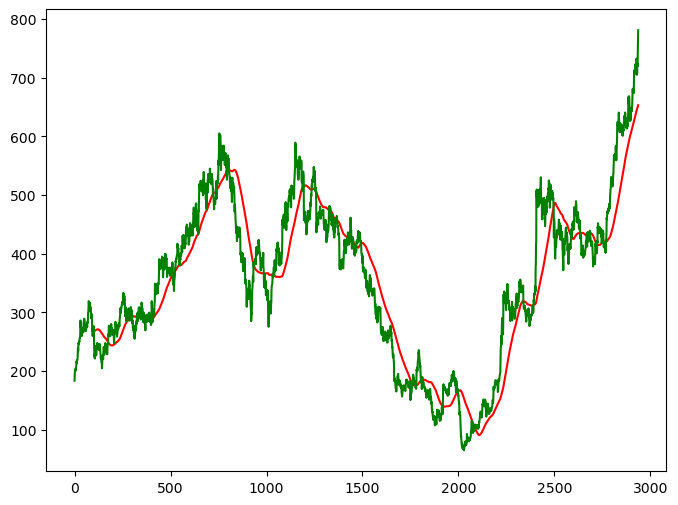

In [8]:
plt.figure(figsize=(8,6))
plt.plot(avg_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
avg_200_days = data.Close.rolling(200).mean()

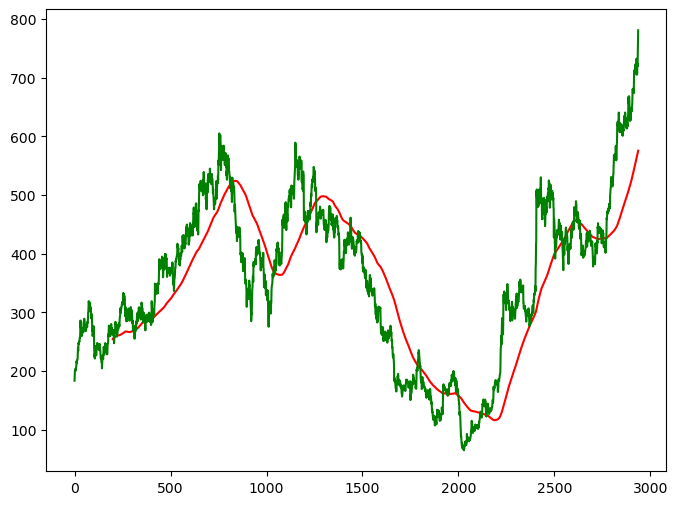

In [10]:
plt.figure(figsize=(8,6))
plt.plot(avg_200_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

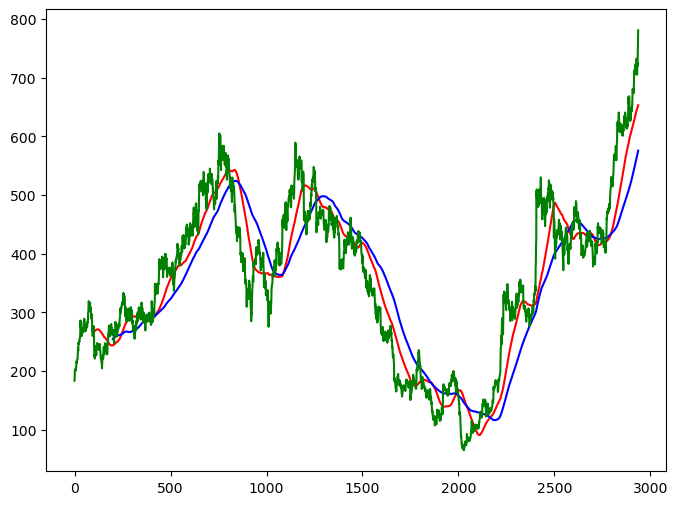

In [11]:
plt.figure(figsize=(8,6))
plt.plot(avg_100_days, 'r')
plt.plot(avg_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
#Splitting the data into training and testing 

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]

2349

In [16]:
data_test.shape[0]

588

Trainig the LSTM model

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\kalya\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 227ms/step - loss: 0.1096
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - loss: 0.0124
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - loss: 0.0104
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 0.0081
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 0.0087
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - loss: 0.0075
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 0.0078
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - loss: 0.0066
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 0.0063
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 0.0060
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 0.0060
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 0.0058
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - loss: 0.0055
Epoch 14/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 0.0056
Epoch 15/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

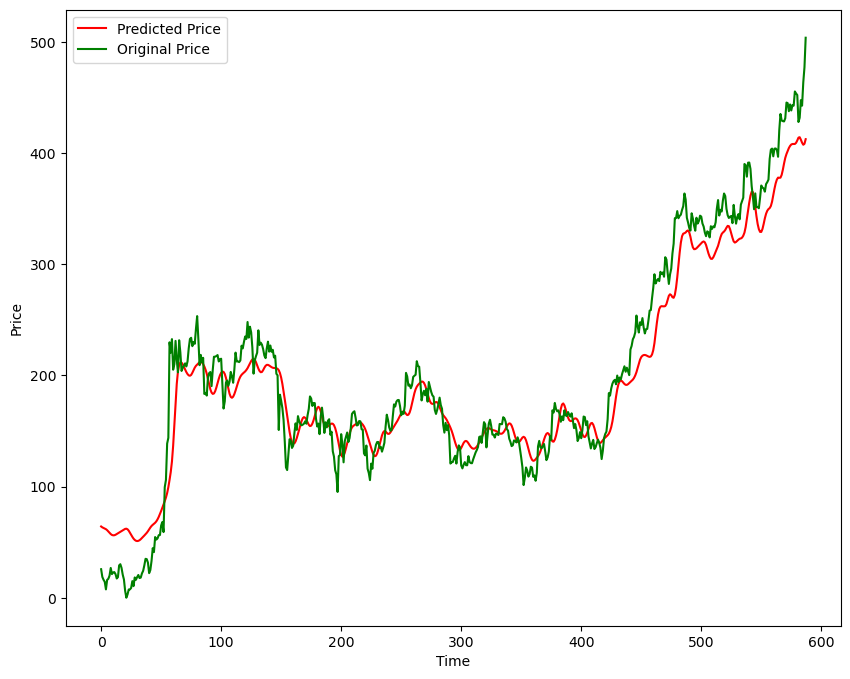

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')